<a href="https://colab.research.google.com/github/anusurabhi/Data-Science/blob/main/MNIST%20data%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

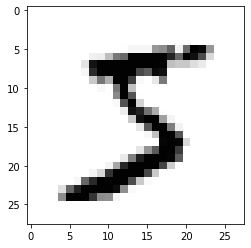

In [9]:
plt.imshow(single_image, cmap='Greys')

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train.shape

(60000,)

In [13]:
y_test.shape

(10000,)

In [14]:
y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_test.shape

(10000, 10)

In [15]:
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_train.shape

(60000, 10)

In [16]:
x_train = x_train/255

In [17]:
x_test = x_test/255

In [18]:
scaled_image = x_train[0]

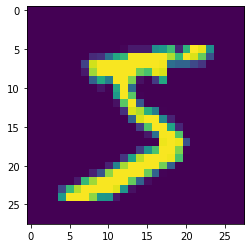

In [19]:
plt.imshow(scaled_image)

In [20]:
x_train.shape

(60000, 28, 28)

In [21]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [22]:
x_train.shape

(60000, 28, 28, 1)

In [27]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [28]:
x_test.shape

(10000, 28, 28, 1)

In [29]:
from tensorflow.keras.models import Sequential

In [30]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [31]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [34]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1485 - accuracy: 0.9547 - val_loss: 0.0519 - val_accuracy: 0.9839
Epoch 2/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0491 - accuracy: 0.9849 - val_loss: 0.0446 - val_accuracy: 0.9842
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0325 - accuracy: 0.9901 - val_loss: 0.0393 - val_accuracy: 0.9866
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0209 - accuracy: 0.9934 - val_loss: 0.0523 - val_accuracy: 0.9832


In [35]:
metrics = pd.DataFrame(model.history.history)

In [36]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.148463,0.954717,0.051941,0.9839
1,0.049097,0.984867,0.044600,0.9842
2,0.032547,0.990050,0.039304,0.9866
3,0.020867,0.993450,0.052251,0.9832


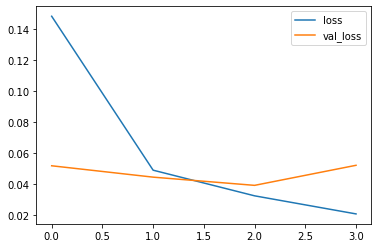

In [37]:
metrics[['loss', 'val_loss']].plot()

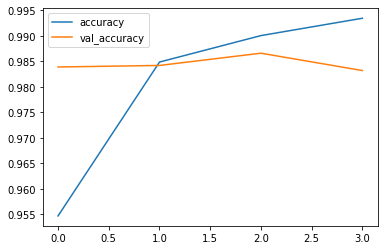

In [38]:
metrics[['accuracy', 'val_accuracy']].plot()

In [39]:
model.metrics_names

['loss', 'accuracy']

In [40]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0523 - accuracy: 0.9832


[0.05225050821900368, 0.9832000136375427]

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
predictions = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [46]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.97      1.00      0.99      1010
           4       0.95      1.00      0.97       982
           5       0.99      0.98      0.98       892
           6       1.00      0.97      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [47]:
print(confusion_matrix(y_test, predictions))

[[ 977    0    0    2    0    0    0    0    1    0]
 [   0 1130    1    2    0    0    1    1    0    0]
 [   3    0 1018    4    1    0    1    3    2    0]
 [   0    0    0 1007    0    2    0    0    1    0]
 [   0    0    0    0  980    0    0    0    0    2]
 [   2    0    0   11    0  876    1    0    1    1]
 [  11    2    0    1   11    4  928    0    1    0]
 [   1    1    7    1    1    0    0 1015    1    1]
 [  10    0    3    2    4    1    1    3  944    6]
 [   3    2    0    3   37    4    0    3    0  957]]


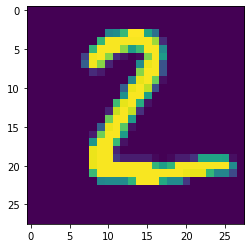

In [49]:
my_image = x_test[1] # Pick a random sample data from the x_test dataset
plt.imshow(my_image.reshape(28,28)) # showing the image to verify it. Take note that it should be a 2D data format and thus we are reshaping it to 28,28

In [53]:
# model.predict_classes(x_test[1].reshape(1,28,28,1)) # Here reshaping the data because the model is trained with (number of data, width, height, number of channels)
np.argmax(model.predict(x_test[1].reshape(1,28,28,1)), axis=-1)

array([2])